<a href="https://colab.research.google.com/github/amrutask/Machine_Learning/blob/master/HomeWork1/Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Adding 4 additional features:

Training data shape:  (60000, 788)
Test data shape:  (10000, 788)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 1.2740 - acc: 0.6907 - val_loss: 0.7985 - val_acc: 0.8320
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.7036 - acc: 0.8428 - val_loss: 0.5940 - val_acc: 0.8659
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5737 - acc: 0.8633 - val_loss: 0.5103 - val_acc: 0.8802
Epoch 4/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5107 - acc: 0.8745 - val_loss: 0.4640 - val_acc: 0.8873
Epoch 5/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4718 - acc: 0.8810 - val_loss: 0.4331 - val_acc: 0.8936
Epoch 6/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.4447 - acc: 0.886

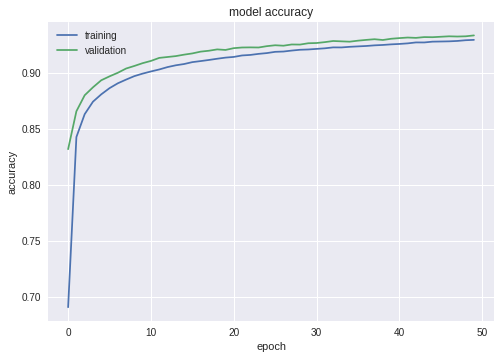

In [2]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape) 

print("Adding 4 additional features:\n")

# Feature 1. Number of white regions for each digit with normalization
# Feature 2. Actual height of each digit within the 28*28 image
# Feature 3. Actual width of each digit within the 28*28 image
# Feature 4. Even or odd ( 1 for even and 0 for odd)

regions=np.zeros((10))
regions[0]=2/3
regions[1]=regions[2]=regions[3]=regions[4]=regions[5]=regions[7]=1/3
regions[6]=regions[9]=2/3
regions[8]=3/3

new_regions=np.zeros((x_train.shape[0],1))
heights=np.zeros((x_train.shape[0],1))
widths=np.zeros((x_train.shape[0],1))
even_odd=np.zeros((x_train.shape[0],1))

for i in range(0, x_train.shape[0]):
  new_regions[i]=regions[y_train[i]]
  
  #Height calculations
  image = x_train[i]
  heights[i] = ((x_train.shape[1] - np.argmax(np.argmax(np.flip(image,0),0),0)) - np.argmax(np.argmax(image,0),0))
  #Width Calculations
  widths[i] =  ((x_train.shape[2] - np.argmax(np.argmax(np.flip(image,1),1))) - np.argmax(np.argmax(image,1)))
  
  if y_train[i]%2==0:
    even_odd[i]==1

max_height=np.amax(heights)
max_width=np.amax(widths)

heights=heights/max_height
width=widths/max_width

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_train=x_train/255

x_train=np.concatenate((x_train, new_regions), axis=1)
x_train=np.concatenate((x_train, heights), axis=1)
x_train=np.concatenate((x_train, widths), axis=1)
x_train=np.concatenate((x_train, even_odd), axis=1)
print("Training data shape: ", x_train.shape)


new_regions_test=np.zeros((10000,1))
heights_test=np.zeros((x_test.shape[0],1))
widths_test=np.zeros((x_test.shape[0],1))
even_odd_test=np.zeros((x_test.shape[0],1))


for i in range(0, x_test.shape[0]):
  new_regions_test[i]=regions[y_test[i]]
  
  #Height calculations
  image = x_test[i]
  heights_test[i] = ((x_test.shape[1] - np.argmax(np.argmax(np.flip(image,0),0),0)) - np.argmax(np.argmax(image,0),0))
  #Width Calculations
  widths_test[i] =  ((x_test.shape[2] - np.argmax(np.argmax(np.flip(image,1),1))) - np.argmax(np.argmax(image,1)))
  
  if y_test[i]%2==0:
    even_odd_test[i]==1


max_height_test=np.amax(heights_test)
max_width_test=np.amax(widths_test)

heights_test=heights_test/max_height_test
width_test=widths_test/max_width_test  

x_test = x_test.reshape(x_test.shape[0], image_vector_size)
x_test=x_test/255

x_test=np.concatenate((x_test, new_regions_test), axis=1)
x_test=np.concatenate((x_test, heights_test), axis=1)
x_test=np.concatenate((x_test, widths_test), axis=1)
x_test=np.concatenate((x_test, even_odd_test), axis=1)

print("Test data shape: ", x_test.shape)


num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

image_size = 784
extra_features=4
batch_size = 128 
epochs = 50

model = Sequential()
model.add(Dense(num_classes, input_dim=image_size+extra_features, activation='softmax')) 

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
